### Question: Are we calculating the 0 applications correctly?

In [1]:
import numpy as np
import time
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from drugsLib.drug import statesFromBits, Drug, hamDist, csvExplore, matrixPlotter

In [2]:
AMPf = np.array([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821])
AMf  = np.array([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047])
CECf = np.array([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516])
CTXf = np.array([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412])
ZOXf = np.array([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591])
CXMf = np.array([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923])
CROf = np.array([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227])
AMCf = np.array([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728])
CAZf = np.array([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563])
CTTf = np.array([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543])
SAMf = np.array([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453])
CPRf = np.array([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288])
CPDf = np.array([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268])
TZPf = np.array([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171])
FEPf = np.array([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203])

In [3]:
states = statesFromBits(16, 4)

# Zero State of equal probabilities
S0 = np.array(np.ones(len(states))/2**4)

In [4]:
# Initialize all Drug Classes
# Parameters are (Name, fitness array, states assigned to those fitness values
#                 genotype associated with lowest fitness peak, and R defaults to 0)
AMP = Drug('Ampicillin', AMPf, states, '0110')
AM = Drug('Amoxicillin', AMf, states, '0010')
CEC = Drug('Cefaclor', CECf, states, '0100')
CTX = Drug('Cefotaxime', CTXf, states, '1010')
ZOX = Drug('Ceftizoxime', ZOXf, states, '1001')
CXM = Drug('Cefuroxime', CXMf, states, '0100')
CRO = Drug('Ceftriaxone', CROf, states, '0100')
AMC = Drug('Amoxicillin+Clav', AMCf, states, '0100')
CAZ = Drug('Ceftazidime', CAZf, states, '0011')
CTT = Drug('Cefotetan', CTTf, states, '1101')
SAM = Drug('Ampicillin+Sulbactam', SAMf, states, '1111')
CPR = Drug('Cefprozil', CPRf, states, '0011')
CPD = Drug('Cefpodoxime', CPDf, states, '1010')
TZP = Drug('Piperacillin+Tazobactam', TZPf, states, '1000')
FEP = Drug('Cefepime', FEPf, states, '0000')

# list of all drug Classes
allDrugs = [AMP, AM, CEC, CTX, ZOX , CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]

col_names=['Final Drug', 'Steering Drug 1', 'Steering Drug 1 Amount', 'Steering Drug 2', 'Steering Drug 2 Amount',
           'Drug1:Drug2', 'Drug1+Drug2', 'Fitness of infinite apps', 'Lowest Fitness Achieved',
           'Maximum Simulated Drug Application', 'R-Value', 'epsilon', 'rho', 'theta']

For example, looking at the plot, the fastest way to reach fitness is length 0. That does not intuitively make sense.

2.042


,Final Drug,Steering Drug 1,Steering Drug 1 Amount,Steering Drug 2,Steering Drug 2 Amount,Drug1:Drug2,Drug1+Drug2,Fitness of infinite apps,Lowest Fitness Achieved,Maximum Simulated Drug Application,R-Value,epsilon,rho,theta
332,Amoxicillin,Ampicillin+Sulbactam,1,Cefprozil,0,inf,1,[2.36034198],2.332867,10,0,0.05,1.0,0.000000
3272,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.12052355],2.184875,10,1,0.05,0.0,NaN
6212,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.10454712],2.182832,10,2,0.05,0.0,NaN
9152,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.09029475],2.180625,10,3,0.05,0.0,NaN
12092,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,0,NaN,0,[2.07798425],2.178853,10,4,0.05,0.0,NaN
15032,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.06807126],2.150557,10,5,0.05,1.0,1.570796
17972,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.06052711],2.147949,10,6,0.05,1.0,1.570796
20912,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.05499228],2.145863,10,7,0.05,1.0,1.570796
23852,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.05102745],2.144176,10,8,0.05,1.0,1.570796
26792,Amoxicillin,Ampicillin+Sulbactam,0,Cefprozil,1,0.000000,1,[2.04823253],2.142794,10,9,0.05,1.0,1.570796


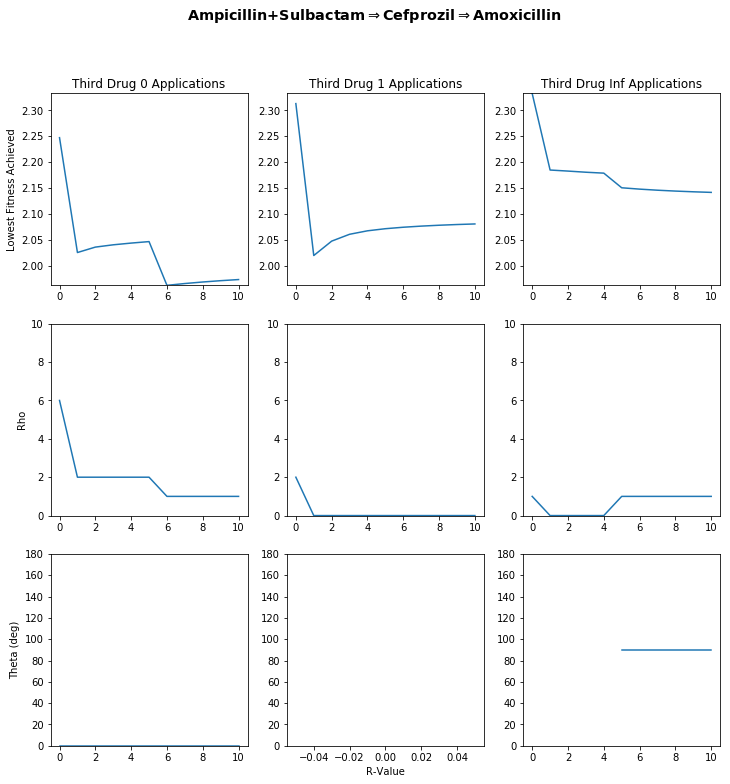

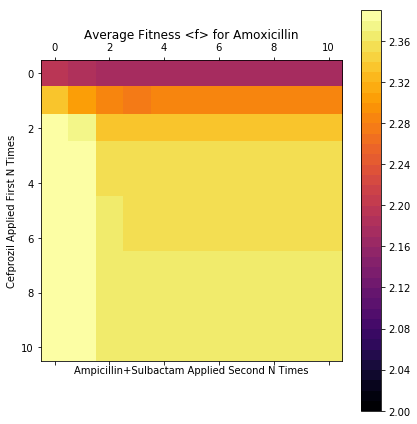

In [5]:
df = csvExplore(SAM, CPR, AM)
print(AM.LPFf)
matrixPlotter(SAM, CPR, AM, 2, 2.4)
df[2]

This is important. The difference beteern these two plots is how zero applications is handled. Previously, raised the transition matrix to the power of the application. When we included zero applications, I never thought about what raising to the power of zero applications would do. Now, the lower plot shows fitness values incorporating zero applications by removing the drug from the calculation.

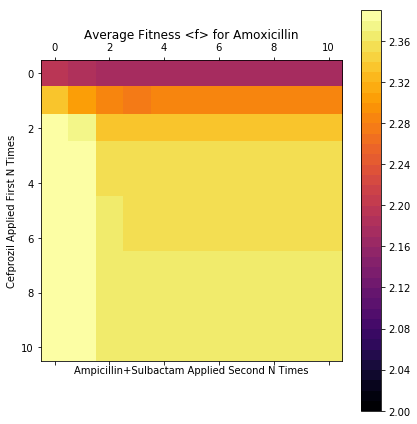

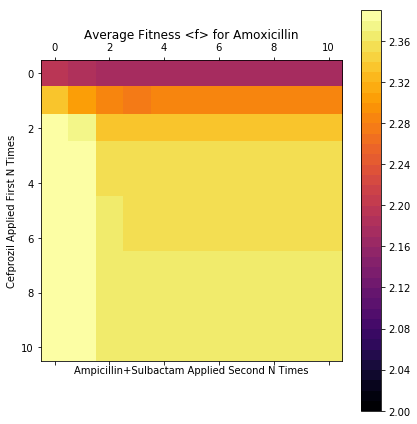

In [6]:
matrixPlotter(SAM, CPR, AM, 2, 2.4)
matrixPlotter(SAM, CPR, AM, 2, 2.4, mod=-1)

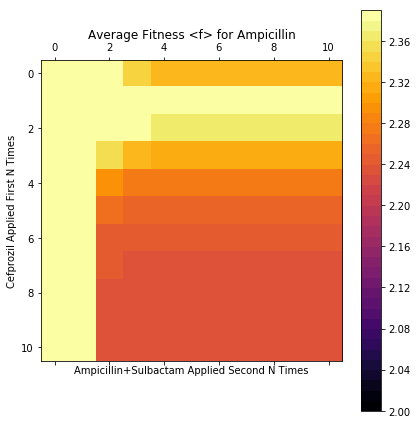

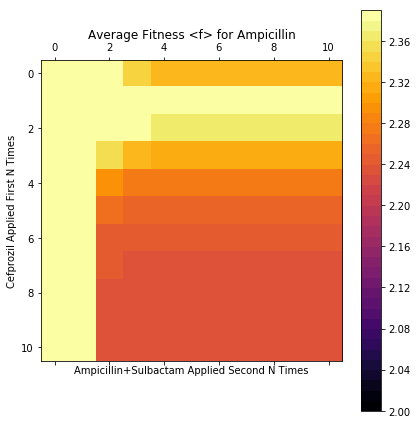

In [7]:
matrixPlotter(SAM, CPR, AMP, 2, 2.4)
matrixPlotter(SAM, CPR, AMP, 2, 2.4, mod=-1)

The code is included here in the notebook for easier differentation between the methods. More investigation is needed to understand how to accommodate zero applications.

- Michael Douglass 2018-09-11

In [8]:
def matrixPlotter(DRUG1, DRUG2, DRUG, yminF=0, ymaxF=3.4, mod=None, Ap=10, S0=None, states=None):

    if states == None:
        states = statesFromBits(16, 4)
    else:
        states = states

    if S0 == None:
        S0 = np.array(np.ones(len(states))/2**4)
    else:
        S0 = S0

    cmap = plt.cm.inferno
    norm = mpl.colors.BoundaryNorm(np.arange(yminF,ymaxF,0.01), cmap.N)

    avgMat = np.zeros([Ap+1, Ap+1])
    
    
    
    ### RELEVANT AREA
    if mod == None:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**100
                AvgFit = np.dot(np.array(SN[0,:]), DRUG.Fit)
                avgMat[NA, NB] = AvgFit
    if mod == -1:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                if NA == 0 and NB == 0:
                    SN = np.array(S0) * DRUG.tMat**100
                elif NA == 0:
                    SN = np.array(S0) * DRUG2.tMat**NB * DRUG.tMat**100
                elif NB == 0:
                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG.tMat**100
                else:
                    SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**100
                AvgFit = np.dot(np.array(SN[0,:]), DRUG.Fit)
                avgMat[NA, NB] = AvgFit
                
                

    if mod == 1:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB * DRUG.tMat**1
                AvgFit = np.dot(np.array(SN[0,:]), DRUG.Fit)
                avgMat[NA, NB] = AvgFit
    if mod == 0:
        for NA in range(0,Ap+1):
            for NB in range(0,Ap+1):
                SN = np.array(S0) * DRUG1.tMat**NA * DRUG2.tMat**NB
                AvgFit = np.dot(np.array(SN[0,:]), DRUG.Fit)
                avgMat[NA, NB] = AvgFit

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    Z = ax.matshow(avgMat, cmap=cmap, norm=norm)
    ax.set_xlabel(DRUG1.name + ' Applied Second N Times')
    ax.set_ylabel(DRUG2.name + ' Applied First N Times')
    ax.set_title('Average Fitness <f> for ' + DRUG.name)
    plt.colorbar(Z)
    plt.tight_layout()

In [13]:
# In exploring previous code, I may have found that r-values were only held at 0
# However, calculation of the probability matrix lines up.
from pprint import pprint as pp

AMP0 = Drug('Ampicillin', AMPf, states, '0110')
AMP1 = Drug('Ampicillin', AMPf, states, '0110', R = 1)
AMP2 = Drug('Ampicillin', AMPf, states, '0110', R = 2)
pp(AMP0.tMat)
print('------------------------------------------------------------')
pp(AMP1.tMat)
print('------------------------------------------------------------')
pp(AMP2.tMat)

matrix([[0.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.33333333, 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.5       , 0.        ,
         0.        , 0.5       , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.3333